### Feature Engineering and EDA of Google Play Store 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [134]:
df = pd.read_csv('./data/playstore_data/googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [135]:
df.shape

(10841, 13)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [137]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [138]:
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


### Data Cleaning

In [139]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Dataset has missing values 

In [140]:
## check all the values in reviews are numeric

df['Reviews'].str.isnumeric().sum()

10840

In [141]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [142]:
df_copy = df.copy()
df_copy.drop(df_copy.index[10472], inplace=True)

In [143]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [144]:
# convert review data type to int 
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [145]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [146]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [147]:
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.NaN)

In [148]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', nan, '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M',
       '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M',
       '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M',
       '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k',
       

In [149]:
def convert_to_num(value):

    num = 0
    if pd.isna(value):
        return np.nan
    if 'M' in value:
        num = float(value[:-1])*1000000
    if 'k' in value:
        num = float(value[:-1])*1000
    return num


In [150]:
df_copy['Size'] = df_copy['Size'].apply(convert_to_num)

In [151]:
df_copy['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 7.00e+06, 2.30e+07, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07,      nan,
       9.40e+06, 1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06,
       7.90e+06, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

In [152]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [153]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [154]:
chars_to_remove = ['+',',','$']

cols_to_clean = ['Installs', 'Price']

for item in chars_to_remove:
    for col in cols_to_clean:
        df_copy[col] = df_copy[col].str.replace(item,'')

In [155]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [156]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [157]:
df_copy['Installs'] = df_copy['Installs'].astype(int)

In [158]:
df_copy['Price'] = df_copy['Price'].astype(float)

In [159]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [160]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [161]:
# Handling last update feature

df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [162]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] = df_copy["Last Updated"].dt.day
df_copy['Month'] = df_copy["Last Updated"].dt.month
df_copy['Year'] = df_copy["Last Updated"].dt.year

In [163]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [164]:
df_copy.to_csv('./data/playstore_data/cleaned_play_store.csv')

### EDA

In [165]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [166]:
df_copy.duplicated('App').sum()


1181

The dataset has duplicated records

In [167]:
df_copy = df_copy.sort_values(by='Last Updated')

In [168]:
df_copy.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [169]:
df_copy[df_copy.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


### Explore Data

In [170]:
numberic_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
cat_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print(f"We have {(len(numberic_features))} numberica features : {numberic_features}")
print(f"We have {(len(cat_features))} categorical features : {cat_features}")

We have 9 numberica features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [171]:
for col in cat_features:
    print(df_copy[col].value_counts())
    print("_________________________")

App
FML F*ck my life + widget                                                        1
San Andreas Crime City Gangster 3D                                               1
DreamMapper                                                                      1
【Ranobbe complete free】 Novelba - Free app that you can read and write novels    1
Funny Jokes Photos                                                               1
                                                                                ..
30 Day Ab Challenge FREE                                                         1
Google AdSense                                                                   1
EW Login                                                                         1
DB Sound Meter: Measure Noise Level- Decibel Meter                               1
Shoot Hunter-Gun Killer                                                          1
Name: count, Length: 9659, dtype: int64
_________________________
Category
FAMILY  

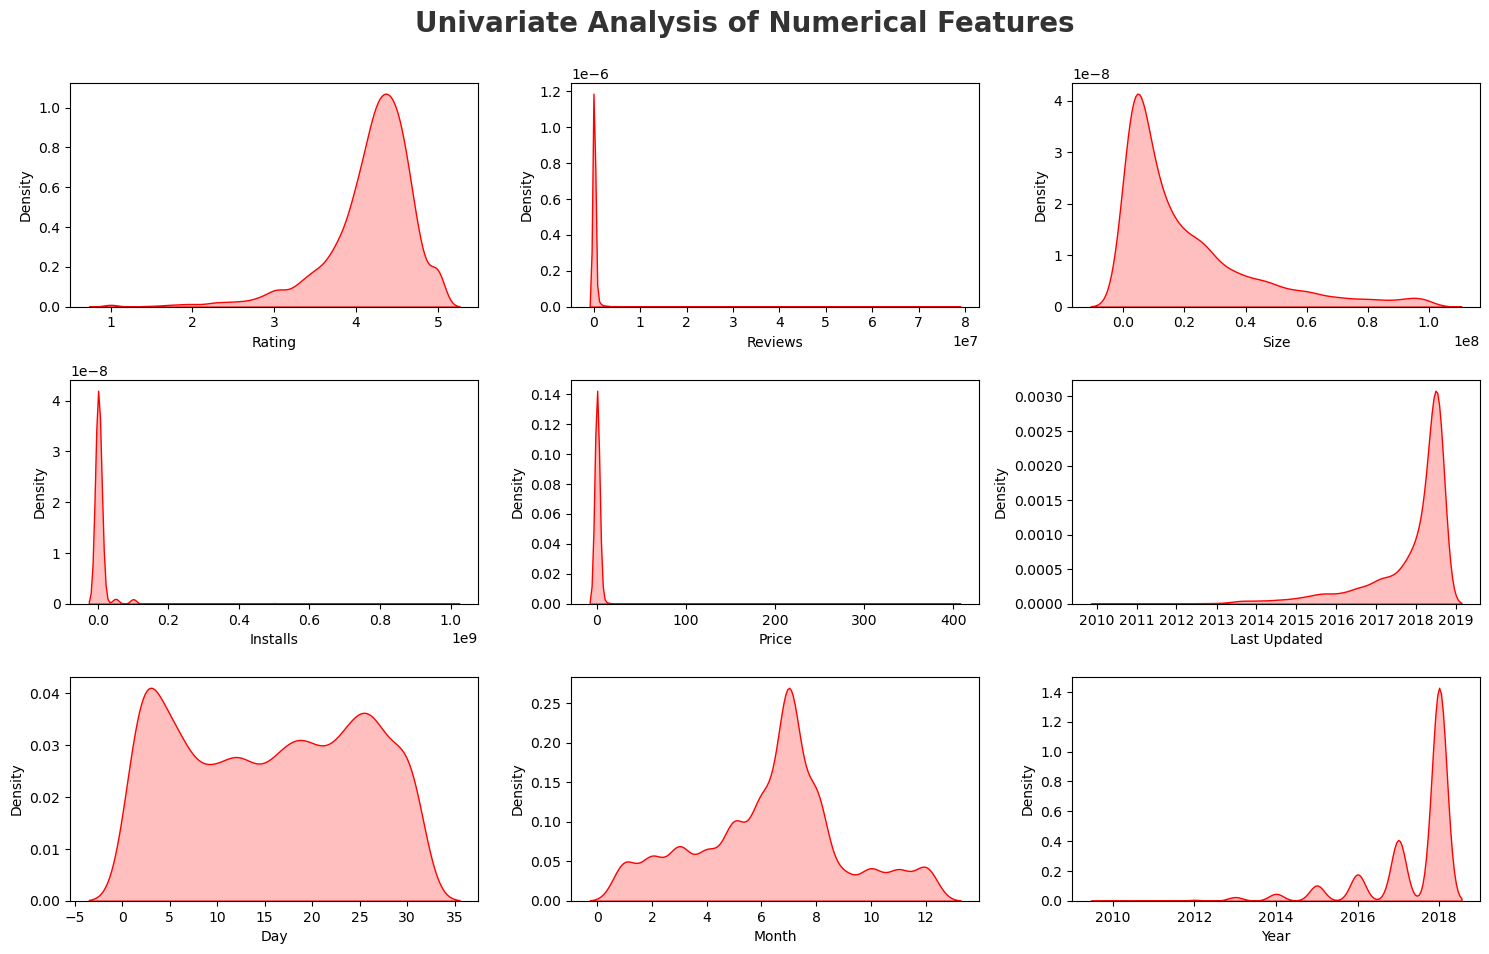

In [172]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numberic_features)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x=df_copy[numberic_features[i]], fill= True, color='r')
    plt.xlabel(numberic_features[i])
    plt.tight_layout()
    
plt.show()

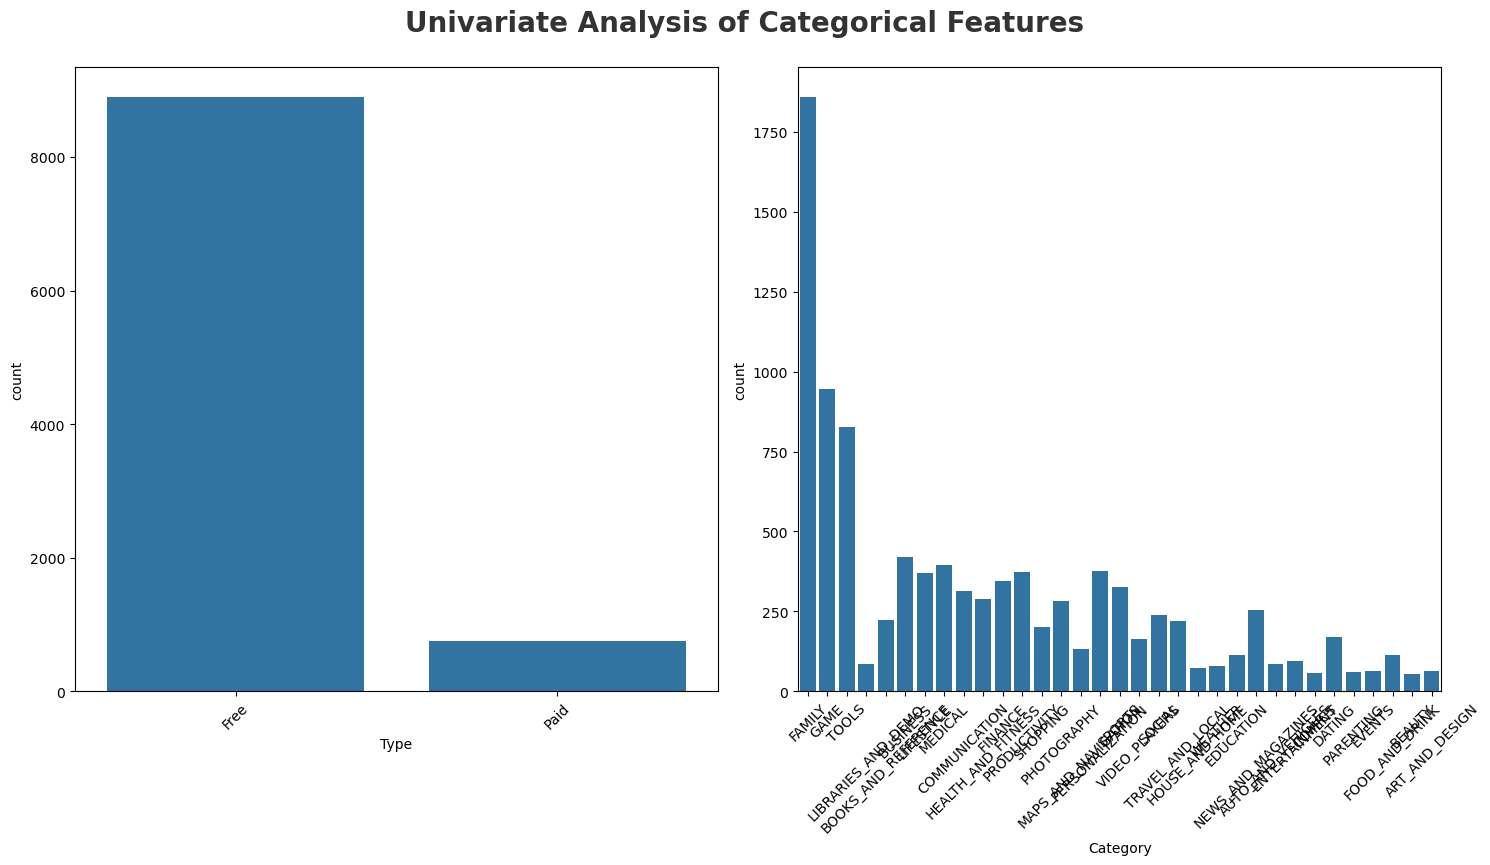

In [173]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
cat_feature = ['Type', 'Category']
for i in range(0, len(cat_feature)):
    plt.subplot(2,2, i+1)
    sns.countplot(x=df_copy[cat_feature[i]])
    plt.xlabel(cat_feature[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    
plt.show()

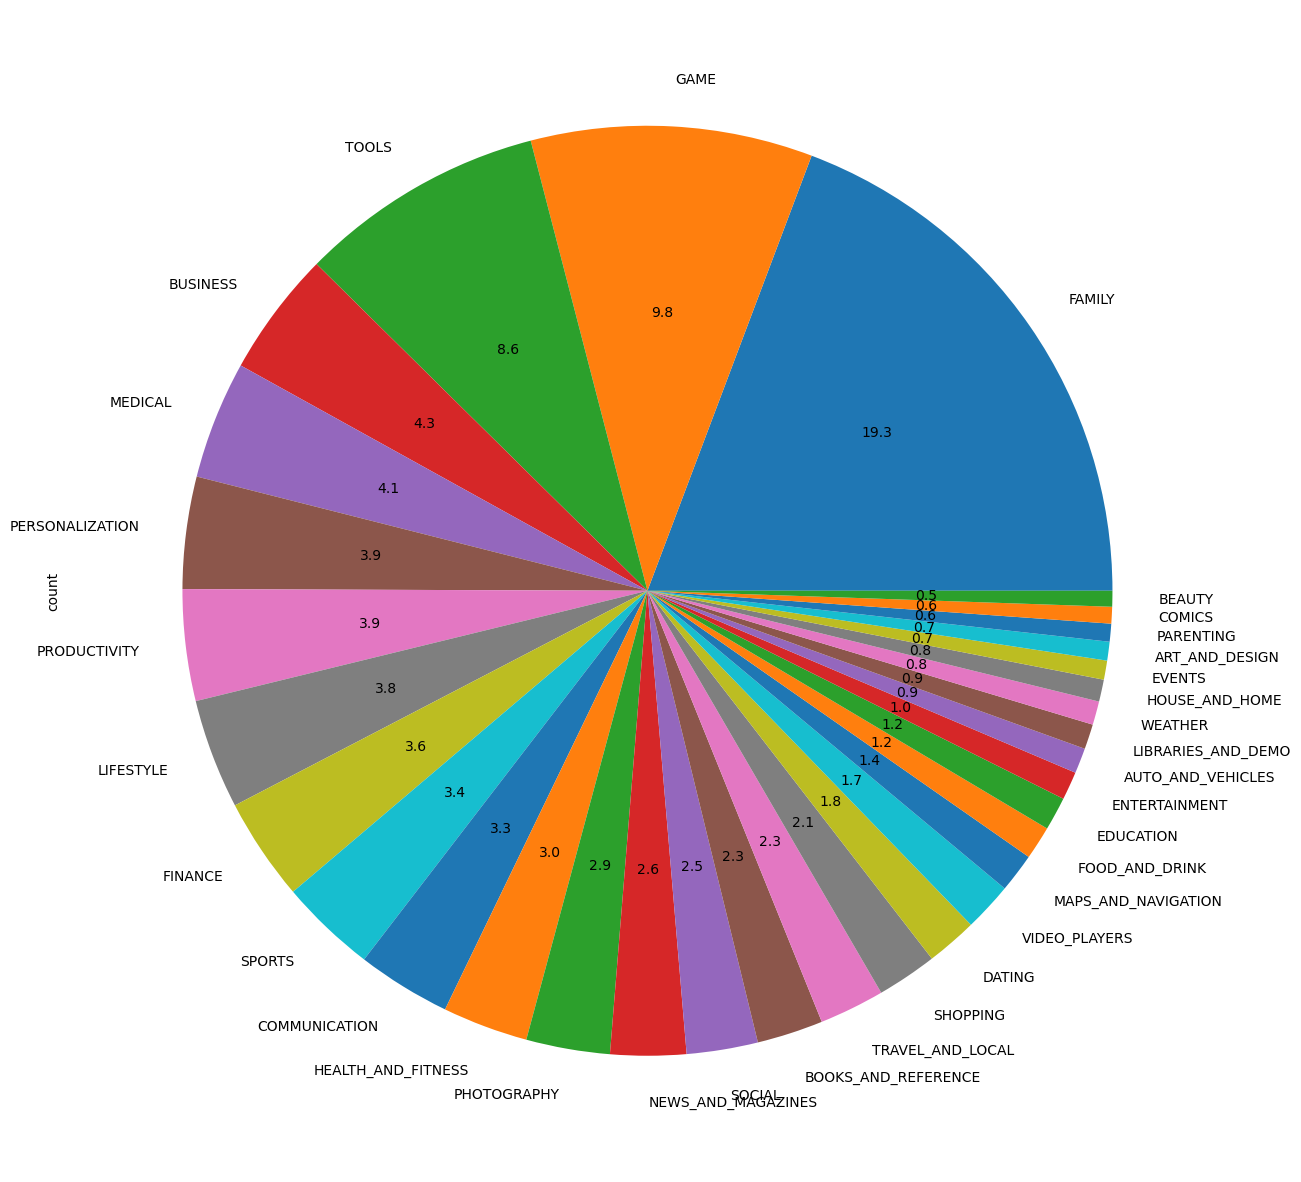

In [179]:
df_copy['Category'].value_counts().plot.pie(y=df['Category'], figsize=(15, 16), autopct='%1.1f')
plt.show()

In [189]:
df_copy['Category'].value_counts()

Category
FAMILY                 1860
GAME                    945
TOOLS                   827
BUSINESS                420
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               112
ENTERTAINMENT            95
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [193]:
## Top 10 categories

category =pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={'Category': 'Count'}, inplace=True)

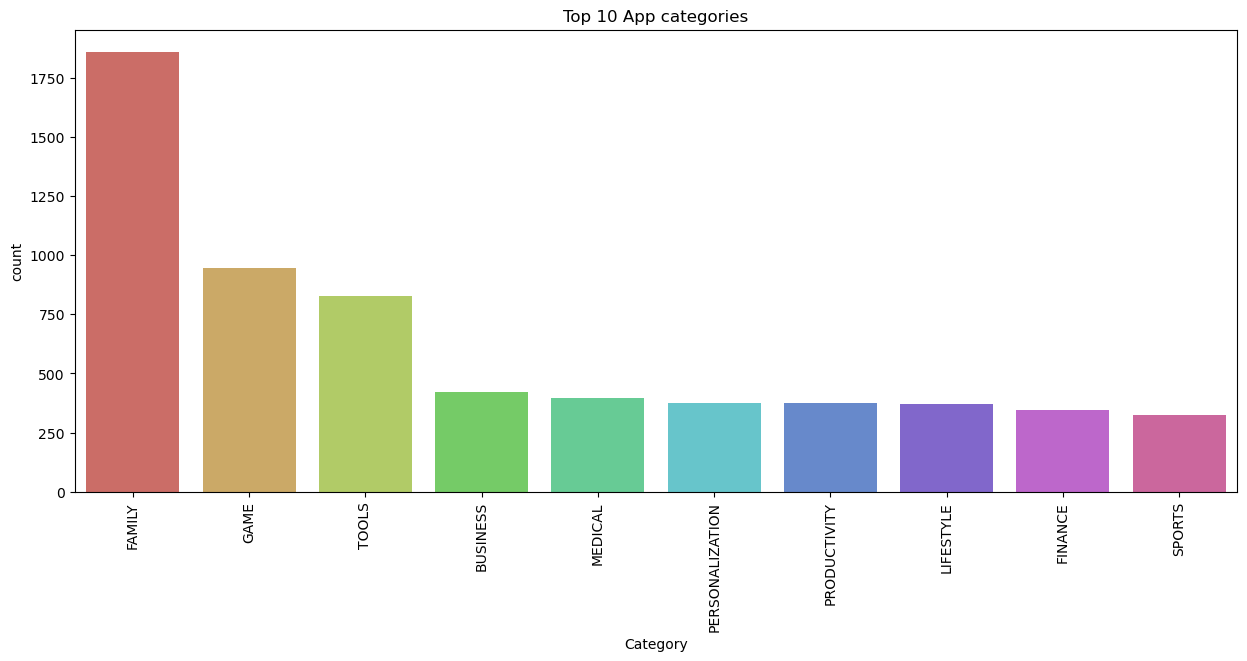

In [195]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y='count', data = category[:10], palette='hls')
plt.title("Top 10 App categories")
plt.xticks(rotation=90)
plt.show()

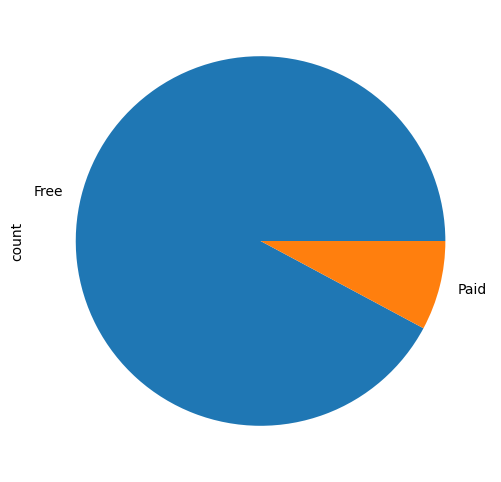

In [176]:
df_copy['Type'].value_counts().plot.pie(y=df['Type'], figsize=(15, 6))
plt.show()

In [196]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
7479,FML F*ck my life + widget,FAMILY,4.2,1415,209000.0,100000,Free,0.0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up,21,5,2010
7430,CJ Poker Odds Calculator,GAME,4.1,207,116000.0,50000,Free,0.0,Everyone,Card,2011-01-30,1.2,1.6 and up,30,1,2011
10282,FD Shift Calendar Widget,TOOLS,4.1,981,73000.0,100000,Free,0.0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up,16,3,2011
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767,4100000.0,5000000,Free,0.0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up,11,4,2011
8084,Freecell CY,GAME,4.0,387,1100000.0,50000,Free,0.0,Everyone,Card,2011-04-16,1.3.3,1.6 and up,16,4,2011


In [208]:
df_most_installs = df_copy[['Installs','Category']].groupby('Category').sum('Installs').sort_values(by='Installs', ascending=False)

In [215]:
df_most_installs[0:5].plot.bar( y='Installs', figsize=(5,3))

<Axes: xlabel='Category'>

In [216]:
df_most_installs[0:5]

,Installs
Category,
GAME,12912924415
COMMUNICATION,11038276251
TOOLS,8001771915
PRODUCTIVITY,5793091369
FAMILY,5678942505


In [233]:
top_5_per_category = df_copy[['Installs','Category','App']].groupby(['Category','App']).sum('Installs').reset_index()

In [240]:
for cat in top_5_per_category['Category'].unique():
    print(f"--------------{cat}-----------------")
    print(top_5_per_category[top_5_per_category['Category']==cat][['App','Installs']].sort_values(by='Installs', ascending=False)[0:5])



--------------ART_AND_DESIGN-----------------
                                                  App  Installs
48                              Sketch - Draw & Paint  50000000
55                         Textgram - write on photos  10000000
52                     Tattoo Name On My Photo Editor  10000000
61                                       ibis Paint X  10000000
9   Canva: Poster, banner, card maker & graphic de...  10000000
--------------AUTO_AND_VEHICLES-----------------
                                                   App  Installs
68       Android Auto - Maps, Media, Messaging & Voice  10000000
69                       AutoScout24 - used car finder  10000000
139                        Used cars for sale - Trovit   5000000
133                                 Ulysse Speedometer   5000000
99   Fines of the State Traffic Safety Inspectorate...   5000000
--------------BEAUTY-----------------
                                        App  Installs
155           Beauty Camera - Selfie Ca

In [226]:
df_copy[df_copy['Rating']==5].shape[0]

271

In [234]:
top_5_per_category.columns

Index(['Category', 'App', 'Installs'], dtype='object')